# **Text Clustering**

## Automatically grouping sentences (or documents) into “buckets” so that items in the same bucket are more similar to each other than to those in other buckets.

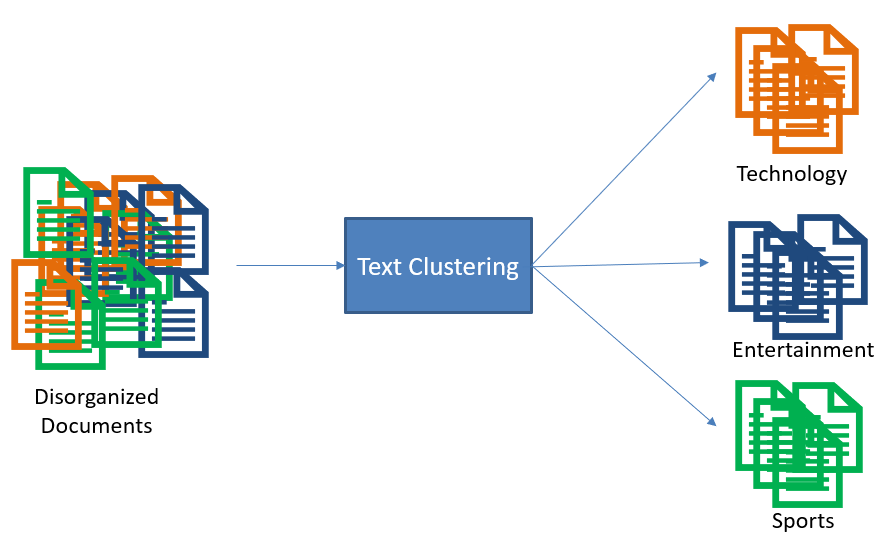



---


# **Key Steps:**

##**1- Text Preprocessing**

### Remove punctuation/special characters, convert to lowercase, strip extra whitespace, etc.

### For ensuring the consistency so that “Apple,” “apple,” and “apple!” all look the same to the model.

# **2- Text Encoding (Embeddings)**

### Turning each sentence into a fixed-length vector of numbers that captures its meaning by using a pre-trained Transformer (e.g., BERT, DistilBERT, RoBERTa) to generate a sentence embedding.

### These vectors place semantically similar sentences close together in “*vector space.*”

#**3- Clustering**

## Usually something like k-means, where you decide on the number of clusters (e.g., 2) by:

- Randomly initialize “centers” for each cluster.

- Assign each sentence-vector to its nearest center.

- Recompute each center as the average of its assigned vectors.

- Repeat until assignments stabilize.

## Finally, two (or more) groups of sentences that share similar semantic content.

#**4- Analysis**

## Inspecting the Clusters by looking at example sentences from each group.

## Then, Give each cluster a label or theme (e.g., “product feedback,” “customer support”).



# Clusters are utilized for ***spotting trends***, ***automate tagging***, or ***guide further exploration***.


---
# **Why We Use Text Clustering ?**

## By embedding models turn words or sentences into numeric vectors that reflect their semantic relationships, not just the presence of surface tokens.

## Clustering groups those meanings without needing any pre-labeled data.

## Overall, Clustering is an unsupervised method that automatically groups semantically similar embeddings into clusters based solely on their vector distances. This lets you discover natural themes in text data without any manual labeling beforehand.

In [1]:
! pip install transformers

In [2]:
from sklearn.cluster import KMeans
from transformers import pipeline
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:


# Sample text data
texts = [
    "The stock market is experiencing a downturn.",
    "Financial news affects stock prices significantly.",
    "Machine learning models can predict stock trends.",
    "Natural language processing is a field of AI.",
    "Artificial intelligence is transforming industries.",
    "AI and ML are revolutionizing technology."
]





---


### `embedder(text)` generates a multi-dimensional representation for the input text.

### [0][0] selects the first embedding vector for each text (the one that represents the entire sentence).

### In some contexts (e.g., sentence embeddings), the embedding for the first token (often [CLS] for classification tasks) is considered to represent the entire sequence. The second [0] grabs the first token’s hidden-state vector from that example.
###[0][0] selects this token's embedding to represent the whole text for simplicity.

### Example Input Text:

text = "I love programming." Tokenization:

The tokens for BERT would look like this:

["[CLS]", "I", "love", "programming", ".", "[SEP]"]


---


### For Feature extraction, we use `distilbert-base-uncased` to extract features (embeddings) from each text. These embeddings are high-dimensional vectors that capture the semantic meaning of the text.



In [4]:
embedder = pipeline("feature-extraction", model="distilbert-base-uncased")

embeddings = np.array([embedder(text)[0][0] for text in texts])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu




---

# **Tokinization in Text Clustering:**

##**1- Tokenization**

### The sentence will be splitted into bite-sized pieces (tokens); usually words or sub-words; so the model knows what basic chunks to work on.

## **2- Vocabulary Lookup**

### Each token is matched to a unique ID (an integer) in a big “dictionary” of all tokens the model knows.

##**3- Embedding Lookup**

### Those integer IDs index into a large table of pre-trained vectors which are known as ***(“embeddings”)***.


##**4- Positional Encoding**

### Since Transformers see all tokens at once, another special vector will be added to each embedding that tells the model “this is token number 1,” “token number 2,” etc.

### *Now every token’s vector contains both its meaning and its place in the sentence.*

## **5-Passing Initial Embeddings through Transformer Layers**
## The sum of “embedding + position” for each token gives you the initial embeddings.

### These vectors then pass through the Transformer’s self-attention and feed-forward blocks, which refine them based on context; so each token’s final vector reflects both what it means and how it relates to every other token.

In [5]:
embeddings

array([[-0.11914983, -0.24909317,  0.21455984, ..., -0.33034667,
         0.46316773,  0.18947344],
       [-0.12618239,  0.01917514, -0.13414674, ..., -0.54006362,
         0.3416703 ,  0.17460604],
       [-0.16931954, -0.31375366, -0.28037068, ..., -0.52922297,
         0.10378298,  0.31346372],
       [-0.36033738, -0.15827496, -0.44066107, ..., -0.30592629,
        -0.28378633,  0.61944491],
       [-0.34193957, -0.38718134, -0.3569515 , ..., -0.46891382,
         0.67052406,  0.00261098],
       [-0.27100277, -0.13417952,  0.04574129, ..., -0.41855982,
         0.44901586,  0.03705932]])

In [6]:
embeddings.shape

(6, 768)

## Hidden Size = 768

### Every token (word or subword) gets turned into a vector of 768 numbers; that’s the “*hidden size.*”

### Those 768 slots each learn to capture some feature of meaning or context during pre-training.

### As a matter of fact, this size is large enough to encode lots of nuance, but small enough to train and run efficiently.

### ***Note***: BERT-base uses 12 transformer layers, each with 768-unit hidden layers. BERT-large ups that to 24 layers and 1,024 units per layer for even richer representations (at a higher compute cost).




---
# **K-Means**

## The k-means algorithm is used to cluster these embeddings into groups based on their similarity. The number of clusters (num_clusters) is a parameter you can adjust depending on your dataset and goals.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Steps:**

###1- Initializing K “centroid” points (randomly or via smarter methods).

###2- Assigning each embedding to the nearest centroid (usually Euclidean distance).

###3- Updating each centroid to be the mean of all embeddings assigned to it.

###4- Repeating steps 2–3 until assignments stop changing.

In [9]:
inertia = []
# Set max_clusters to be the number of samples
max_clusters = len(embeddings)
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

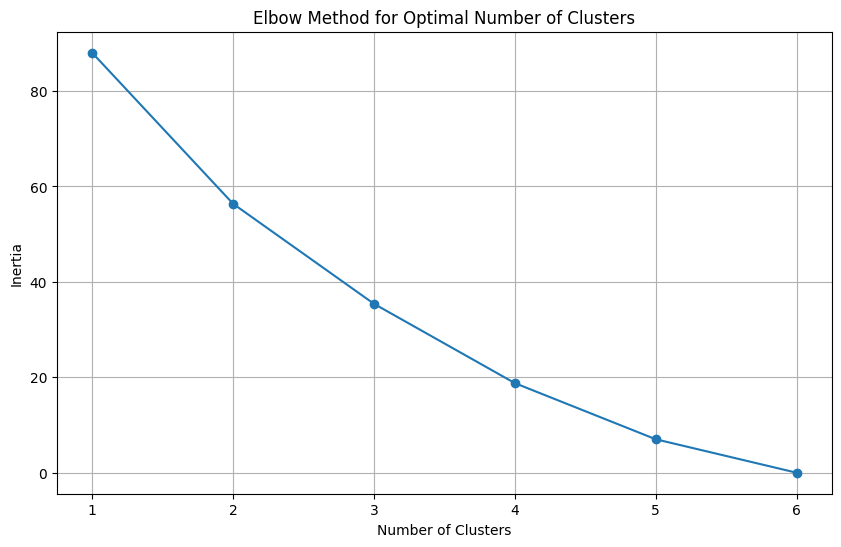

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

### For finding the best number of clustering based on the inertia list we use the **"finite difference of the inertia list"**.

- First finite difference values measure how much the inertia drops when you go from K to K+1.


- Second finite difference values quantify the “acceleration” of the curve’s descent, where it bends most sharply.

In [11]:
import numpy as np

d1 = np.diff(inertia)
d2 = np.diff(d1)
best_k = np.argmax(d2) + 2

print(f"Automatically detected elbow at K = {best_k}")

Automatically detected elbow at K = 2


In [ ]:
optimal_clusters = best_k # Replace with the number of clusters you chose from the plot

# Run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)

# Analyze the clusters (optional, but helpful for understanding)
print(f"\nClustering results with {optimal_clusters} clusters:")
for i in range(optimal_clusters):
    print(f"\nCluster {i+1}:")
    for j, text in enumerate(texts):
        if clusters[j] == i:
            print(f"- {text}")


Clustering results with 2 clusters:

Cluster 1:
- Machine learning models can predict stock trends.
- Natural language processing is a field of AI.
- AI and ML are revolutionizing technology.

Cluster 2:
- The stock market is experiencing a downturn.
- Financial news affects stock prices significantly.
- Artificial intelligence is transforming industries.
